In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('russian_retail.csv')

In [3]:
df['presence_russia'] = df.presence_russia.str.findall('\d+').str[0]

In [4]:
df = df[df.domain.isin(df.domain.value_counts()[:10].index)]

In [5]:
df = df[['founded', 'presence_russia', 'description', 'total_rented_area', 'plans', 'domain']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716 entries, 0 to 2736
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   founded            1582 non-null   float64
 1   presence_russia    1692 non-null   object 
 2   description        1715 non-null   object 
 3   total_rented_area  71 non-null     float64
 4   plans              484 non-null    float64
 5   domain             1716 non-null   object 
dtypes: float64(3), object(3)
memory usage: 93.8+ KB


In [7]:
df.domain.value_counts()

Одежда                       387
Кафе, ресторан               343
Продукты питания             274
Товары и услуги для детей    128
Все для дома                 106
Обувь                        102
Красота                      101
Мебель                        97
Спорт                         90
Ремонт и строительство        88
Name: domain, dtype: int64

In [8]:
df

,founded,presence_russia,description,total_rented_area,plans,domain
0,1967.0,80,Популярный бренд женской обуви и аксессуаров T...,NaN,NaN,Обувь
1,2008.0,4,"На протяжении 8 лет компания ""100 Столов"" зани...",NaN,NaN,Мебель
3,NaN,22,«1000 и одна туфелька» - сеть специализированн...,NaN,NaN,Товары и услуги для детей
4,2008.0,14,«1001 Платье» — российский производитель женск...,NaN,2.0,Одежда
7,2014.0,19,12Storeez — это российская марка женской одежд...,NaN,15.0,Одежда
...,...,...,...,...,...,...
2731,NaN,4,Рестораны нашей сети - по праву считаются одни...,NaN,1.0,"Кафе, ресторан"
2732,2011.0,10,"«Яркий» – сеть магазинов, в которых Вы можете ...",NaN,3.0,Товары и услуги для детей
2734,2008.0,31,ЯРМАРКА МЕБЕЛИ - федеральная сеть мебельных ги...,50000.0,NaN,Мебель
2735,2012.0,400,"«Ярче!» - супермаркеты шаговой доступности, гд...",NaN,30.0,Продукты питания


# Vectorization

### BagOfWords

vocabulary = ['I', 'like', 'dogs', 'cats', 'and']

text = ['I like dogs and cats', 'I like dogs', 'I like like dogs cats cats']

Токенизация - разбиение по словам

words = [['I', 'like', 'dogs', 'and', 'cats'], ...]

vectors = [[1, 1, 1, 1, 1], [1, 1, 1, 0, 0], [1, 2, 1, 2, 0]]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer()

In [11]:
texts = ['I like dogs and and and cats cats', 'I like and  dogs', 'I like like dogs and cats cats']

In [12]:
vectorizer.fit(texts)

CountVectorizer()

In [13]:
vectorizer.transform(texts).toarray()

array([[3, 2, 1, 1],
       [1, 0, 1, 1],
       [1, 2, 1, 2]])

### Tf-Idf Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer = TfidfVectorizer()

In [16]:
vectorizer.fit(texts)

TfidfVectorizer()

In [17]:
vectorizer.transform(texts).toarray()

array([[0.7144376 , 0.61331233, 0.23814587, 0.23814587],
       [0.57735027, 0.        , 0.57735027, 0.57735027],
       [0.28135545, 0.72459275, 0.28135545, 0.56271091]])

### Word2Vec

In [18]:
from gensim.models.word2vec import Word2Vec
from gensim import corpora

In [19]:
words = []

for text in texts:
    words.append(text.split())

In [20]:
word2vec_vectorizer = Word2Vec(vector_size=10, window=5, min_count=1, workers=4)
word2vec_vectorizer.build_vocab(words)
word2vec_vectorizer.train(words, total_examples=len(words), epochs=1)

(0, 19)

In [21]:
def text2vec(text):
    vector = [0 for i in range(10)]
    words_count = 0
    
    for word in text:
        if not word in word2vec_vectorizer.wv:
            continue
            
        vector += word2vec_vectorizer.wv[word]
        words_count += 1
    
    if words_count == 0:
        return vector
    
    return vector / words_count

## Вернемся к задаче
Векторизация описаний компаний

In [22]:
'Популярный бренд женской обуви и аксессуаров Tamaris основан в 1967 г.'
'Популярный бренд женской обуви и аксессуаров Tamaris основан в 1967 г'

'Популярный бренд женской обуви и аксессуаров Tamaris основан в 1967 г'

In [23]:
import re

In [24]:
text = df.description.iloc[0]

In [25]:
'\w', '\d', '\s'

('\\w', '\\d', '\\s')

In [26]:
re.sub('\d', ' ', re.sub('[^\w]', ' ', text))

'Популярный бренд женской обуви и аксессуаров Tamaris основан в      г  в г  Дельтмонд в Германии  Благодаря уникальному позиционированию бренд Tamaris знают     женщин Германии в возрасте от    до    лет  У каждой второй немецкой женщины есть  по крайней мере  одна пара обуви этой марки  Tamaris также присутствует на рынках более чем    стран мира  что делает его одним из флагманов отрасли в Европе  Любительницы обуви найдут в коллекциях Tamaris широчайший ассортимент моделей  из которого можно выбрать подходящую пару для любого случая  Экстравагантные новинки прямо с модных показов  непринужденные сникеры или актуальная классика   европейский бренд номер   остается бессменным фаворитом на подиуме городских улиц  В одноименной коллекции Tamaris и ее трех линейках  Tamaris Fashletics  Tamaris Heart   Sole и Tamaris PureRelax  современные и стильные женщины найдут оптимальное сочетание качества  дизайна и актуальных тенденций  что подарит им много приятных эмоций  Tamaris всегда находит

In [27]:
import pymorphy2

In [28]:
morph = pymorphy2.MorphAnalyzer()

In [29]:
clean_text = re.sub('[^А-Яа-яA-Za-z]', ' ', text)

In [30]:
clean_text = clean_text.lower()

In [31]:
norm_text_words = []

for word in clean_text.split():
    norm_text_words.append(morph.parse(word)[0].normal_form)

In [32]:
norm_text = " ".join(norm_text_words)

In [33]:
vectorizer.fit([norm_text])

TfidfVectorizer()

In [34]:
vectorizer.transform([norm_text]).toarray().shape

(1, 118)

In [35]:
from functools import lru_cache

In [36]:
@lru_cache()
def word2norm(word):
    return morph.parse(word)[0].normal_form

In [37]:
stop_words = list(map(lambda x: x.strip(), open('stop_words.txt').readlines()))

In [38]:
word2normal_form = {}

def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    clean_text = re.sub('\d', ' ', re.sub('[^\w]', ' ', text))
    clean_text = clean_text.lower()
    
    norm_text_words = []

    for word in clean_text.split():
        if word in stop_words:
            continue
            
        if word not in word2normal_form:
            normal_form = morph.parse(word)[0].normal_form
            word2normal_form[word] = normal_form
        else:
            normal_form = word2normal_form[word]
            
        norm_text_words.append(normal_form)
        
    norm_text = " ".join(norm_text_words)
    
    return norm_text

In [39]:
from tqdm.notebook import tqdm

In [40]:
clean_texts = []

for text in tqdm(df.description):
    clean_text = preprocess_text(text)
    clean_texts.append(clean_text)

  0%|          | 0/1716 [00:00<?, ?it/s]

In [41]:
df['clean_description'] = clean_texts

In [42]:
## Если размерность не получается понизить с помощью min_df -> используем max_features=4000
vectorization = TfidfVectorizer(min_df=10)
vectorization.fit(df['clean_description'])

TfidfVectorizer(min_df=10)

In [43]:
description_vectors = vectorization.transform(df['clean_description'])

In [44]:
df.founded.fillna(df.founded.median(), inplace=True)

#### Оффтоп как объединить фичи для модели

In [45]:
# sparse dont forget to do toarray()
description_vectors.shape

(1716, 2127)

In [46]:
df[['founded']].shape

(1716, 1)

In [47]:
import numpy as np

In [48]:
total_vectors = np.hstack((df[['founded']], description_vectors.toarray()))

## Кластеризация

### Kmeans

In [49]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans()
kmeans.fit(description_vectors)

KMeans()

In [51]:
import matplotlib.pyplot as plt

In [52]:
inerties = []
n_clusters = range(5, 30)

for n_cluster in tqdm(n_clusters):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(description_vectors)
    
    inerties.append(kmeans.inertia_)

  0%|          | 0/25 [00:00<?, ?it/s]

Доделать: выбор кол-во кластеров. Нужно использовать метод локтя

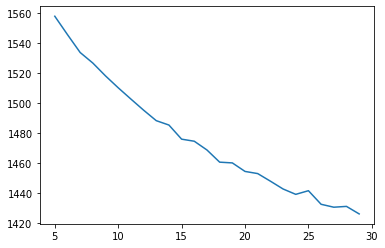

In [53]:
plt.plot(n_clusters, inerties)

Выберем размерность 26

In [54]:
description_vectors.shape

(1716, 2127)

In [55]:
kmeans.predict(description_vectors)

array([ 7, 11,  7, ..., 11,  2, 26], dtype=int32)

In [56]:
from sklearn.decomposition import PCA, TruncatedSVD

In [57]:
pca = TruncatedSVD()
pca.fit(description_vectors)

TruncatedSVD()

In [58]:
projected_vectors = pca.transform(description_vectors)

In [59]:
import seaborn as sns

<AxesSubplot:>

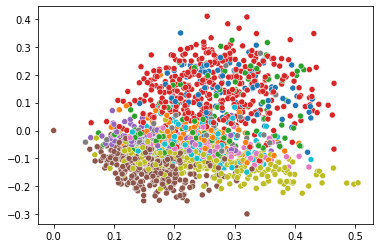

In [60]:
sns.scatterplot(
    x=projected_vectors[:, 0],
    y=projected_vectors[:, 1],
    hue=df.domain,
    legend=False
)

<AxesSubplot:>

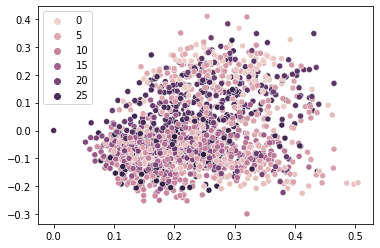

In [61]:
sns.scatterplot(
    x=projected_vectors[:, 0],
    y=projected_vectors[:, 1],
    hue=kmeans.predict(description_vectors),
)

Вот разделение похоже на разделение с целевой выборкой. Значит кластеризация работает корректно.

### Dbscan

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
description_scaler = StandardScaler()

In [65]:
description_scaler.fit(description_vectors.toarray())

StandardScaler()

In [66]:
scaled_description_vectors = description_scaler.transform(description_vectors.toarray())

In [67]:
vals = []

for eps in range(30, 50):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(scaled_description_vectors)
    vals.append(np.unique(dbscan.labels_, return_counts=True))

<AxesSubplot:>

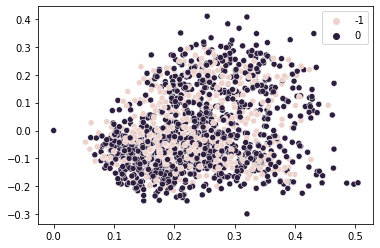

In [68]:
sns.scatterplot(
    x=projected_vectors[:, 0],
    y=projected_vectors[:, 1],
    hue=dbscan.labels_,
)

### Birch

In [69]:
from sklearn.cluster import Birch

In [70]:
birch = Birch()

In [71]:
birch.fit(description_vectors)

Birch()

<AxesSubplot:>

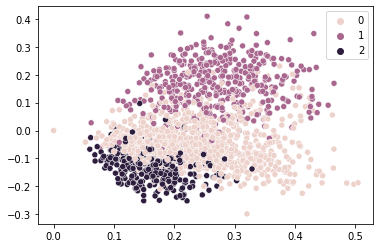

In [72]:
sns.scatterplot(
    x=projected_vectors[:, 0],
    y=projected_vectors[:, 1],
    hue=birch.labels_,
)

### Интерпретация

In [73]:
def interpret_clusterization(labels):
    value_counts = []

    for label_num in np.unique(labels):
        value_counts.append(df[labels == label_num].domain.value_counts())

    return value_counts

In [74]:
interpret_clusterization(kmeans.labels_)

[Кафе, ресторан      11
 Продукты питания     2
 Name: domain, dtype: int64,
 Одежда                       81
 Товары и услуги для детей     4
 Name: domain, dtype: int64,
 Продукты питания             50
 Ремонт и строительство        1
 Товары и услуги для детей     1
 Все для дома                  1
 Одежда                        1
 Name: domain, dtype: int64,
 Продукты питания             35
 Кафе, ресторан               32
 Одежда                       29
 Мебель                       11
 Все для дома                 11
 Красота                       7
 Ремонт и строительство        7
 Спорт                         5
 Обувь                         5
 Товары и услуги для детей     4
 Name: domain, dtype: int64,
 Товары и услуги для детей    20
 Одежда                        2
 Name: domain, dtype: int64,
 Одежда                       49
 Обувь                         7
 Товары и услуги для детей     4
 Мебель                        3
 Все для дома                  2
 Спорт         

In [75]:
interpret_clusterization(birch.labels_)

[Продукты питания             240
 Одежда                       120
 Все для дома                  99
 Красота                       97
 Мебель                        93
 Товары и услуги для детей     85
 Ремонт и строительство        84
 Спорт                         84
 Кафе, ресторан                43
 Обувь                         15
 Name: domain, dtype: int64,
 Одежда                       265
 Обувь                         86
 Товары и услуги для детей     43
 Спорт                          6
 Мебель                         4
 Ремонт и строительство         4
 Все для дома                   3
 Кафе, ресторан                 3
 Продукты питания               2
 Name: domain, dtype: int64,
 Кафе, ресторан      297
 Продукты питания     32
 Красота               4
 Все для дома          4
 Одежда                2
 Обувь                 1
 Name: domain, dtype: int64]

In [76]:
interpret_clusterization(dbscan.labels_)

[Одежда                       159
 Продукты питания             103
 Кафе, ресторан                91
 Все для дома                  46
 Товары и услуги для детей     42
 Обувь                         37
 Ремонт и строительство        37
 Красота                       29
 Мебель                        25
 Спорт                         19
 Name: domain, dtype: int64,
 Кафе, ресторан               252
 Одежда                       228
 Продукты питания             171
 Товары и услуги для детей     86
 Мебель                        72
 Красота                       72
 Спорт                         71
 Обувь                         65
 Все для дома                  60
 Ремонт и строительство        51
 Name: domain, dtype: int64]

Самые популярные топики для каждого кластера встречаются только в них и разность между второй самой популярной и первой - значима.

Kmeans - слишком много топиков, даже не смотря на метод локтя.

Dbscan - слишком мало, как бы eps не подбирали

Birch - три класса, видно что каждый топик входит в кластер почти однозначно.

#### Распределения

<AxesSubplot:ylabel='founded'>

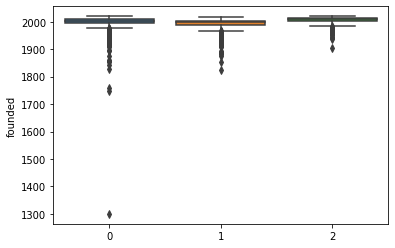

In [77]:
sns.boxplot(
    y=df.founded,
    x=birch.labels_,
)

<AxesSubplot:ylabel='Count'>

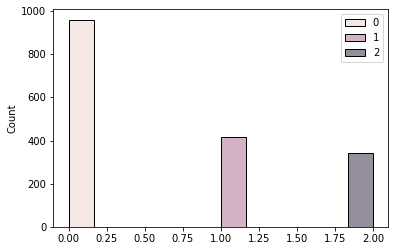

In [78]:
sns.histplot(x=birch.labels_, hue=birch.labels_)

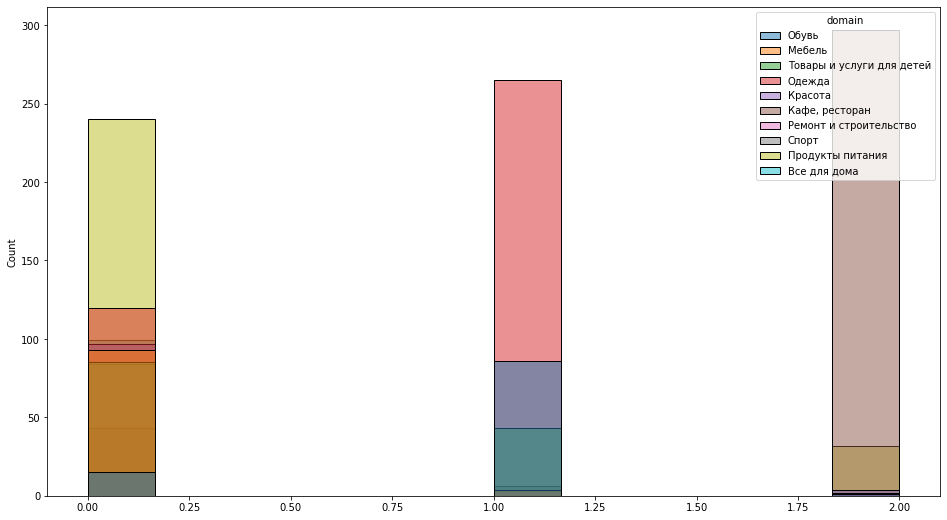

In [79]:
plt.figure(figsize=(16, 9))
sns.histplot(x=birch.labels_, hue=df.domain)
plt.show()

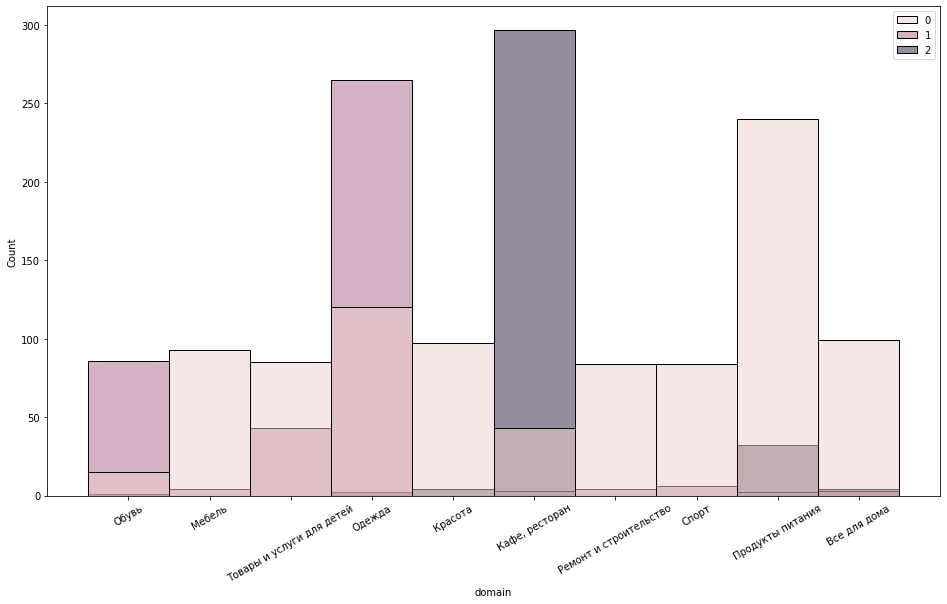

In [80]:
plt.figure(figsize=(16, 9))
sns.histplot(hue=birch.labels_, x=df.domain)
plt.xticks(rotation=30)
plt.show()

Почти в каждом кластере есть преобладающая тема, кроме тем "Одежда" и Товары и услуги для детей". Скорее всего они имеют общий словарный запас в другими. Приходим к выводу, что Birch справился хорошо.

## Тематическое моделирование

### LDA - Латентное распределение Дирихле

In [81]:
from gensim.models import LdaModel, LsiModel, Nmf
from gensim.corpora import Dictionary

In [82]:
# токенизация

clean_texts = []

for text in df.clean_description:
    clean_texts.append(text.split())


In [83]:
common_dictionary = Dictionary(clean_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in clean_texts]

In [84]:
from gensim.models.coherencemodel import CoherenceModel

In [85]:
def fit_topic_modeling(class_topicer_name):
    num_topics = range(3, 15)
    coherences = []

    for num_topic in tqdm(num_topics):
        model = class_topicer_name(
            corpus=common_corpus,
            id2word=common_dictionary,
            num_topics=num_topic
        )
        cm = CoherenceModel(model=model, corpus=common_corpus, coherence='u_mass')
        coherences.append(cm.get_coherence())
    
    plt.title(str(class_topicer_name))
    plt.plot(num_topics, coherences)
    plt.show()
    
    return model

  0%|          | 0/12 [00:00<?, ?it/s]

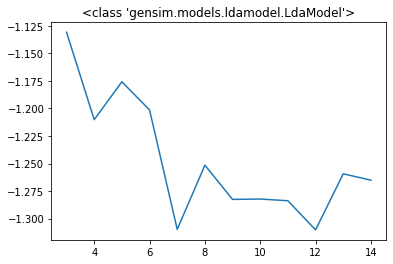

  0%|          | 0/12 [00:00<?, ?it/s]

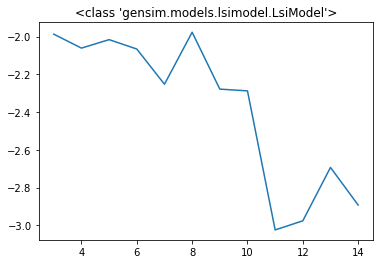

  0%|          | 0/12 [00:00<?, ?it/s]

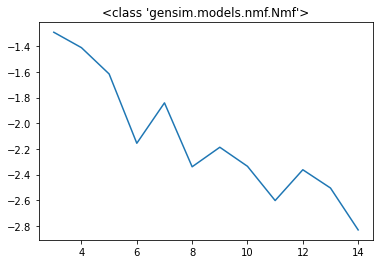

In [86]:
lda_model = fit_topic_modeling(LdaModel)
lsi_model = fit_topic_modeling(LsiModel)
nmf_model = fit_topic_modeling(Nmf)

LDA с 6 топиками имеет coherence -1.2. LSI наибольшая связнасть -1.8 при 7 топиках. Связность NMF достигает максимума -1.5 при кол-ве топиков 4. LDA с 6 топиками имеет наибольшую метрику coherence. Значит оно лучше двух остальных. 

In [87]:
model = LdaModel(
    corpus=common_corpus,
    id2word=common_dictionary,
    num_topics=6
)

In [88]:
df.domain.value_counts()

Одежда                       387
Кафе, ресторан               343
Продукты питания             274
Товары и услуги для детей    128
Все для дома                 106
Обувь                        102
Красота                      101
Мебель                        97
Спорт                         90
Ремонт и строительство        88
Name: domain, dtype: int64

In [89]:
model.show_topics(6, num_words=17)

[(0,
  '0.012*"магазин" + 0.009*"компания" + 0.007*"сеть" + 0.007*"бренд" + 0.005*"одежда" + 0.004*"город" + 0.004*"качество" + 0.004*"торговый" + 0.004*"наш" + 0.004*"ребёнок" + 0.004*"покупатель" + 0.003*"центр" + 0.003*"новый" + 0.003*"хороший" + 0.003*"коллекция" + 0.003*"собственный" + 0.003*"рынок"'),
 (1,
  '0.021*"магазин" + 0.012*"сеть" + 0.010*"компания" + 0.009*"торговый" + 0.008*"товар" + 0.006*"продукция" + 0.006*"качество" + 0.006*"ассортимент" + 0.006*"наш" + 0.005*"покупатель" + 0.005*"одежда" + 0.004*"бренд" + 0.004*"цена" + 0.004*"обувь" + 0.004*"ресторан" + 0.003*"розничный" + 0.003*"собственный"'),
 (2,
  '0.014*"магазин" + 0.012*"компания" + 0.011*"одежда" + 0.009*"сеть" + 0.007*"бренд" + 0.007*"россия" + 0.006*"коллекция" + 0.006*"наш" + 0.005*"обувь" + 0.005*"представить" + 0.005*"производство" + 0.005*"стиль" + 0.004*"продукция" + 0.004*"торговый" + 0.004*"ассортимент" + 0.004*"качество" + 0.004*"город"'),
 (3,
  '0.016*"компания" + 0.013*"сеть" + 0.010*"магазин

Интепретация тем:

0 - максмаркет по продаже одежды

1 - продуктовый

2 - брендованные одежды

3 - отечественное производство

4 - одежда по продажи обуви

5 - в москве одежда

## Обучение модели

Данные для обучения - description_vectors

Можно дополнить данные топиками из LDA и кластеризации

### Подготовка данных

In [91]:
description_vectors.shape

(1716, 2127)

In [92]:
df['domain'].shape

(1716,)

In [93]:
X = description_vectors
target = df['domain']

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

In [97]:
y_train.value_counts()

Одежда                       260
Кафе, ресторан               249
Продукты питания             191
Товары и услуги для детей     96
Мебель                        74
Обувь                         72
Все для дома                  71
Спорт                         66
Ремонт и строительство        62
Красота                       60
Name: domain, dtype: int64

In [98]:
y_test.value_counts()

Одежда                       127
Кафе, ресторан                94
Продукты питания              83
Красота                       41
Все для дома                  35
Товары и услуги для детей     32
Обувь                         30
Ремонт и строительство        26
Спорт                         24
Мебель                        23
Name: domain, dtype: int64

Классы распределены как в начальной выборке так и для трейна так и для теста

### Выбор модели

#### LogisticRegression - базовая модель
Будем на ней подбирать валидационные кривые

In [149]:
clf_lnr = LogisticRegression()

#### RandomForestClassifier

In [150]:
clf_rfr = RandomForestClassifier(random_state=42)

#### SVC

In [151]:
clf_svc = SVC()

#### Подбор валидационной кривой

In [153]:
from tqdm.notebook import tqdm

In [154]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [155]:
def score_prediction(y_test, y_pred, model_name='predictions of', log=False):
    
    _accuracy = accuracy_score(y_test, y_pred)
    _f1_score = f1_score(y_test, y_pred, average='weighted')
    _precision = precision_score(y_test, y_pred, average='weighted')
    _recall = recall_score(y_test, y_pred, average='weighted')
        
    if log:
        print(model_name)

        print('accuracy:', _accuracy)
        print('f1_score:', _f1_score)
        print('precision_score:', _precision)
        print('recall_score:', _recall)
    
    return _accuracy, _f1_score, _precision, _recall

In [156]:
f1_scores = []
test_size_percentages = range(10, 50)

for test_size in tqdm(test_size_percentages):
    test_size = test_size / 100
    
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=42)
    
    clf_lnr.fit(X_train, y_train)
    
    _, _f1_score, _, _ = score_prediction(y_test, clf_lnr.predict(X_test), log=False)
    f1_scores.append(_f1_score)

  0%|          | 0/40 [00:00<?, ?it/s]

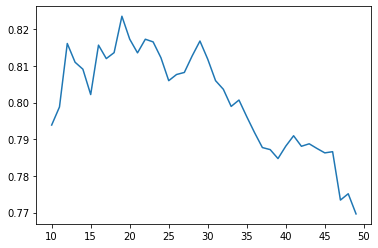

In [145]:
plt.plot(test_size_percentages, f1_scores)

In [147]:
max(f1_scores)

0.823550962681824

In [146]:
test_size_percentages[f1_scores.index(max(f1_scores))]

19

19% тестовой выборки показывают наилучший результат в 0.82 f1_score

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.19, random_state=42)

#### Обучение и предсказания

In [158]:
clf_rfr.fit(X_train, y_train)
score_prediction(y_test, clf_rfr.predict(X_test), 'random forest', log=True);

random forest
accuracy: 0.8226299694189603
f1_score: 0.8037526591584525
precision_score: 0.8354958497160332
recall_score: 0.8226299694189603


In [159]:
clf_lnr.fit(X_train, y_train)
score_prediction(y_test, clf_lnr.predict(X_test), 'logistic regression', log=True);

logistic regression
accuracy: 0.8348623853211009
f1_score: 0.823550962681824
precision_score: 0.8406934267003742
recall_score: 0.8348623853211009


In [160]:
clf_svc.fit(X_train, y_train)
score_prediction(y_test, clf_svc.predict(X_test), 'support vector classifier', log=True);

support vector classifier
accuracy: 0.8409785932721713
f1_score: 0.8296577488683314
precision_score: 0.8452978120686763
recall_score: 0.8409785932721713


Лучший - SVC на базовых параметрах

#### Подбор гиперпараметров

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [173]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [176]:
search_cv = RandomizedSearchCV(
    clf_svc,
    param_grid,
    refit=True,
    n_iter=10,
    verbose=2
)

In [177]:
search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.9s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.9s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   1.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.9s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.9s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END ......................C=10, gamma=0.001

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf']},
                   verbose=2)

In [179]:
search_cv.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}

In [180]:
y_pred = search_cv.predict(X_test)

In [182]:
score_prediction(y_test, y_pred, 'SVC with hyperparameters', log=True);

SVC with hyperparameters
accuracy: 0.8807339449541285
f1_score: 0.8800623576437524
precision_score: 0.8856313484275271
recall_score: 0.8807339449541285


In [185]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

             Все для дома       0.65      0.62      0.64        24
           Кафе, ресторан       0.90      0.96      0.93        55
                  Красота       1.00      0.91      0.95        23
                   Мебель       1.00      0.86      0.92        14
                    Обувь       0.93      0.70      0.80        20
                   Одежда       0.89      0.94      0.92        88
         Продукты питания       0.78      0.88      0.83        51
   Ремонт и строительство       0.92      0.75      0.83        16
                    Спорт       1.00      1.00      1.00        15
Товары и услуги для детей       1.00      0.86      0.92        21

                 accuracy                           0.88       327
                macro avg       0.91      0.85      0.87       327
             weighted avg       0.89      0.88      0.88       327



<AxesSubplot:>

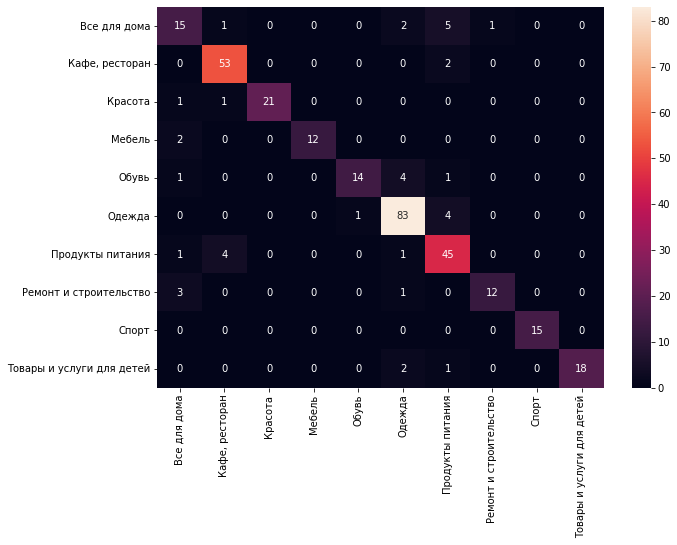

In [189]:
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred), 
    index=sorted(df.domain.unique()),
    columns=sorted(df.domain.unique()),
)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

Итог - модель SVC с гиперпараметрами {'kernel': 'rbf', 'gamma': 0.1, 'C': 10} лучше всего справилась с задачей. 

- accuracy: 0.88
- f1_score: 0.88
- precision_score: 0.89
- recall_score: 0.88